In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os,time
from skimage.feature import hog

In [2]:
#directing the files
cars = os.listdir('./Image Classification/cars')
balls = os.listdir('./Image Classification/Cricket ball')
cones = os.listdir('./Image Classification/Ice cream cone')
catagories = os.listdir('./Image Classification/')
catagories

['Cars', 'Cricket ball', 'Ice cream cone']

In [3]:
#reading the dataset
dataset= []
target = []
# full_images = []
datadir = 'Image Classification/'
for catagory in catagories:
    path = os.path.join(datadir,catagory)
    for img in os.listdir(path):
        
        img_array = cv2.imread(os.path.join(path,img),0)
        resized = cv2.resize(img_array,(128,64))
        fd = hog(resized)
#         full_images.append(resized.flatten())
#         keypoints.append(kp)
        dataset.append(fd.flatten())
        target.append(catagories.index(catagory))

In [4]:
labels = np.array(target)
dataset = np.array(dataset)
# full_dataset = np.array(full_images)
fd.shape

(6804,)

In [5]:
# #splitting the dataset
# from sklearn.model_selection import train_test_split
# X_train_f, X_test_f, y_train, y_test = train_test_split(full_dataset, labels, test_size=0.2, random_state=0)

In [6]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=0)

In [7]:
# X_train.shape

In [8]:
#fitting the classifier
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(C=2.0)
st = time.time()
cls.fit(X_train, y_train)
ft = time.time()-st
ft

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.8129756450653076

In [10]:
# #fitting the classifier
# from sklearn.linear_model import LogisticRegression
# cls_f = LogisticRegression(C=2.0)
# st = time.time()
# cls_f.fit(X_train_f, y_train)
# ft = time.time()-st
# ft

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2.2822797298431396

In [12]:
preds = cls.predict(X_test)

In [13]:
# preds_f = cls_f.predict(X_test_f)
# cls_f.score(X_test_f,preds_f)

In [14]:
cls.score(X_test,y_test)

0.9696969696969697

In [15]:
img = cv2.imread('./mini-cooper-auto-model-vehicle.jpg',0)
img = cv2.resize(img, (128,64))
ft = hog(img)
result = cls.predict([ft])
print(catagories[result[0]])

Cars


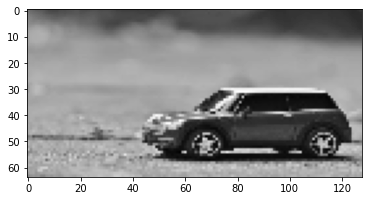

In [16]:
plt.imshow(img,cmap = 'gray')

In [17]:
img = cv2.imread('./mini-cooper-auto-model-vehicle.jpg',0)
img = cv2.resize(img, (128,64))
# ft = hog(img)
result = cls_f.predict([img.flatten()])
# print(catagories[result[0]])
result

array([1])

In [18]:
cls.score(X_train,y_train)

1.0

In [19]:
cls.score(X_test,y_test)

0.9696969696969697

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm

array([[63,  0,  0],
       [ 1, 71,  0],
       [ 4,  1, 58]], dtype=int64)